In [1]:
'https://www.kaggle.com/code/akshat0007/applying-knn-for-regression-on-zomato-dataset/notebook'
import os
import sys

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

root = os.path.dirname(os.path.abspath("."))
sys.path.append(root)

import predikit as pk

C:\Users\M\AppData\Local\Temp\ipykernel_26492\711870691.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
df=pd.read_csv("./sample_data/zomato.csv",encoding = "ISO-8859-1")
country = pd.read_excel('./sample_data/Country-Code.xlsx')
df = pd.merge(df, country, on='Country Code')
df.head()
df1=df.groupby(["Cuisines"])
df1.mean()
df2=df.groupby(["City"])
df2.mean()
df3=df["City"].value_counts()

2024-03-09 13:22:03,615 (pyplot.py:414) - DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-09 13:22:03,616 (pyplot.py:414) - DEBUG: Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-09 13:22:03,624 (font_manager.py:1411) - DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-03-09 13:22:03,626 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2024-03-09 13:22:03,628 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym'

2024-03-09 13:22:03,689 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\MTCORSVA.TTF', name='Monotype Corsiva', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-09 13:22:03,690 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\arial.ttf', name='Arial', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 6.413636363636363
2024-03-09 13:22:03,691 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LFAXD.TTF', name='Lucida Fax', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
2024-03-09 13:22:03,693 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='C:\\Windows\\Fonts\\LSANSD.TTF', name='Lucida Sans', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
2024-03-09 13:22:03,694 (font_manager.py:1423) - DEBUG: findfo

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'India'),
  Text(4, 0, 'Indonesia'),
  Text(5, 0, 'New Zealand'),
  Text(6, 0, 'Phillipines'),
  Text(7, 0, 'Qatar'),
  Text(8, 0, 'Singapore'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Sri Lanka'),
  Text(11, 0, 'Turkey'),
  Text(12, 0, 'UAE'),
  Text(13, 0, 'United Kingdom'),
  Text(14, 0, 'United States')])

2024-03-09 13:22:04,418 (font_manager.py:1411) - DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
2024-03-09 13:22:04,420 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2024-03-09 13:22:04,420 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-09 13:22:04,421 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\

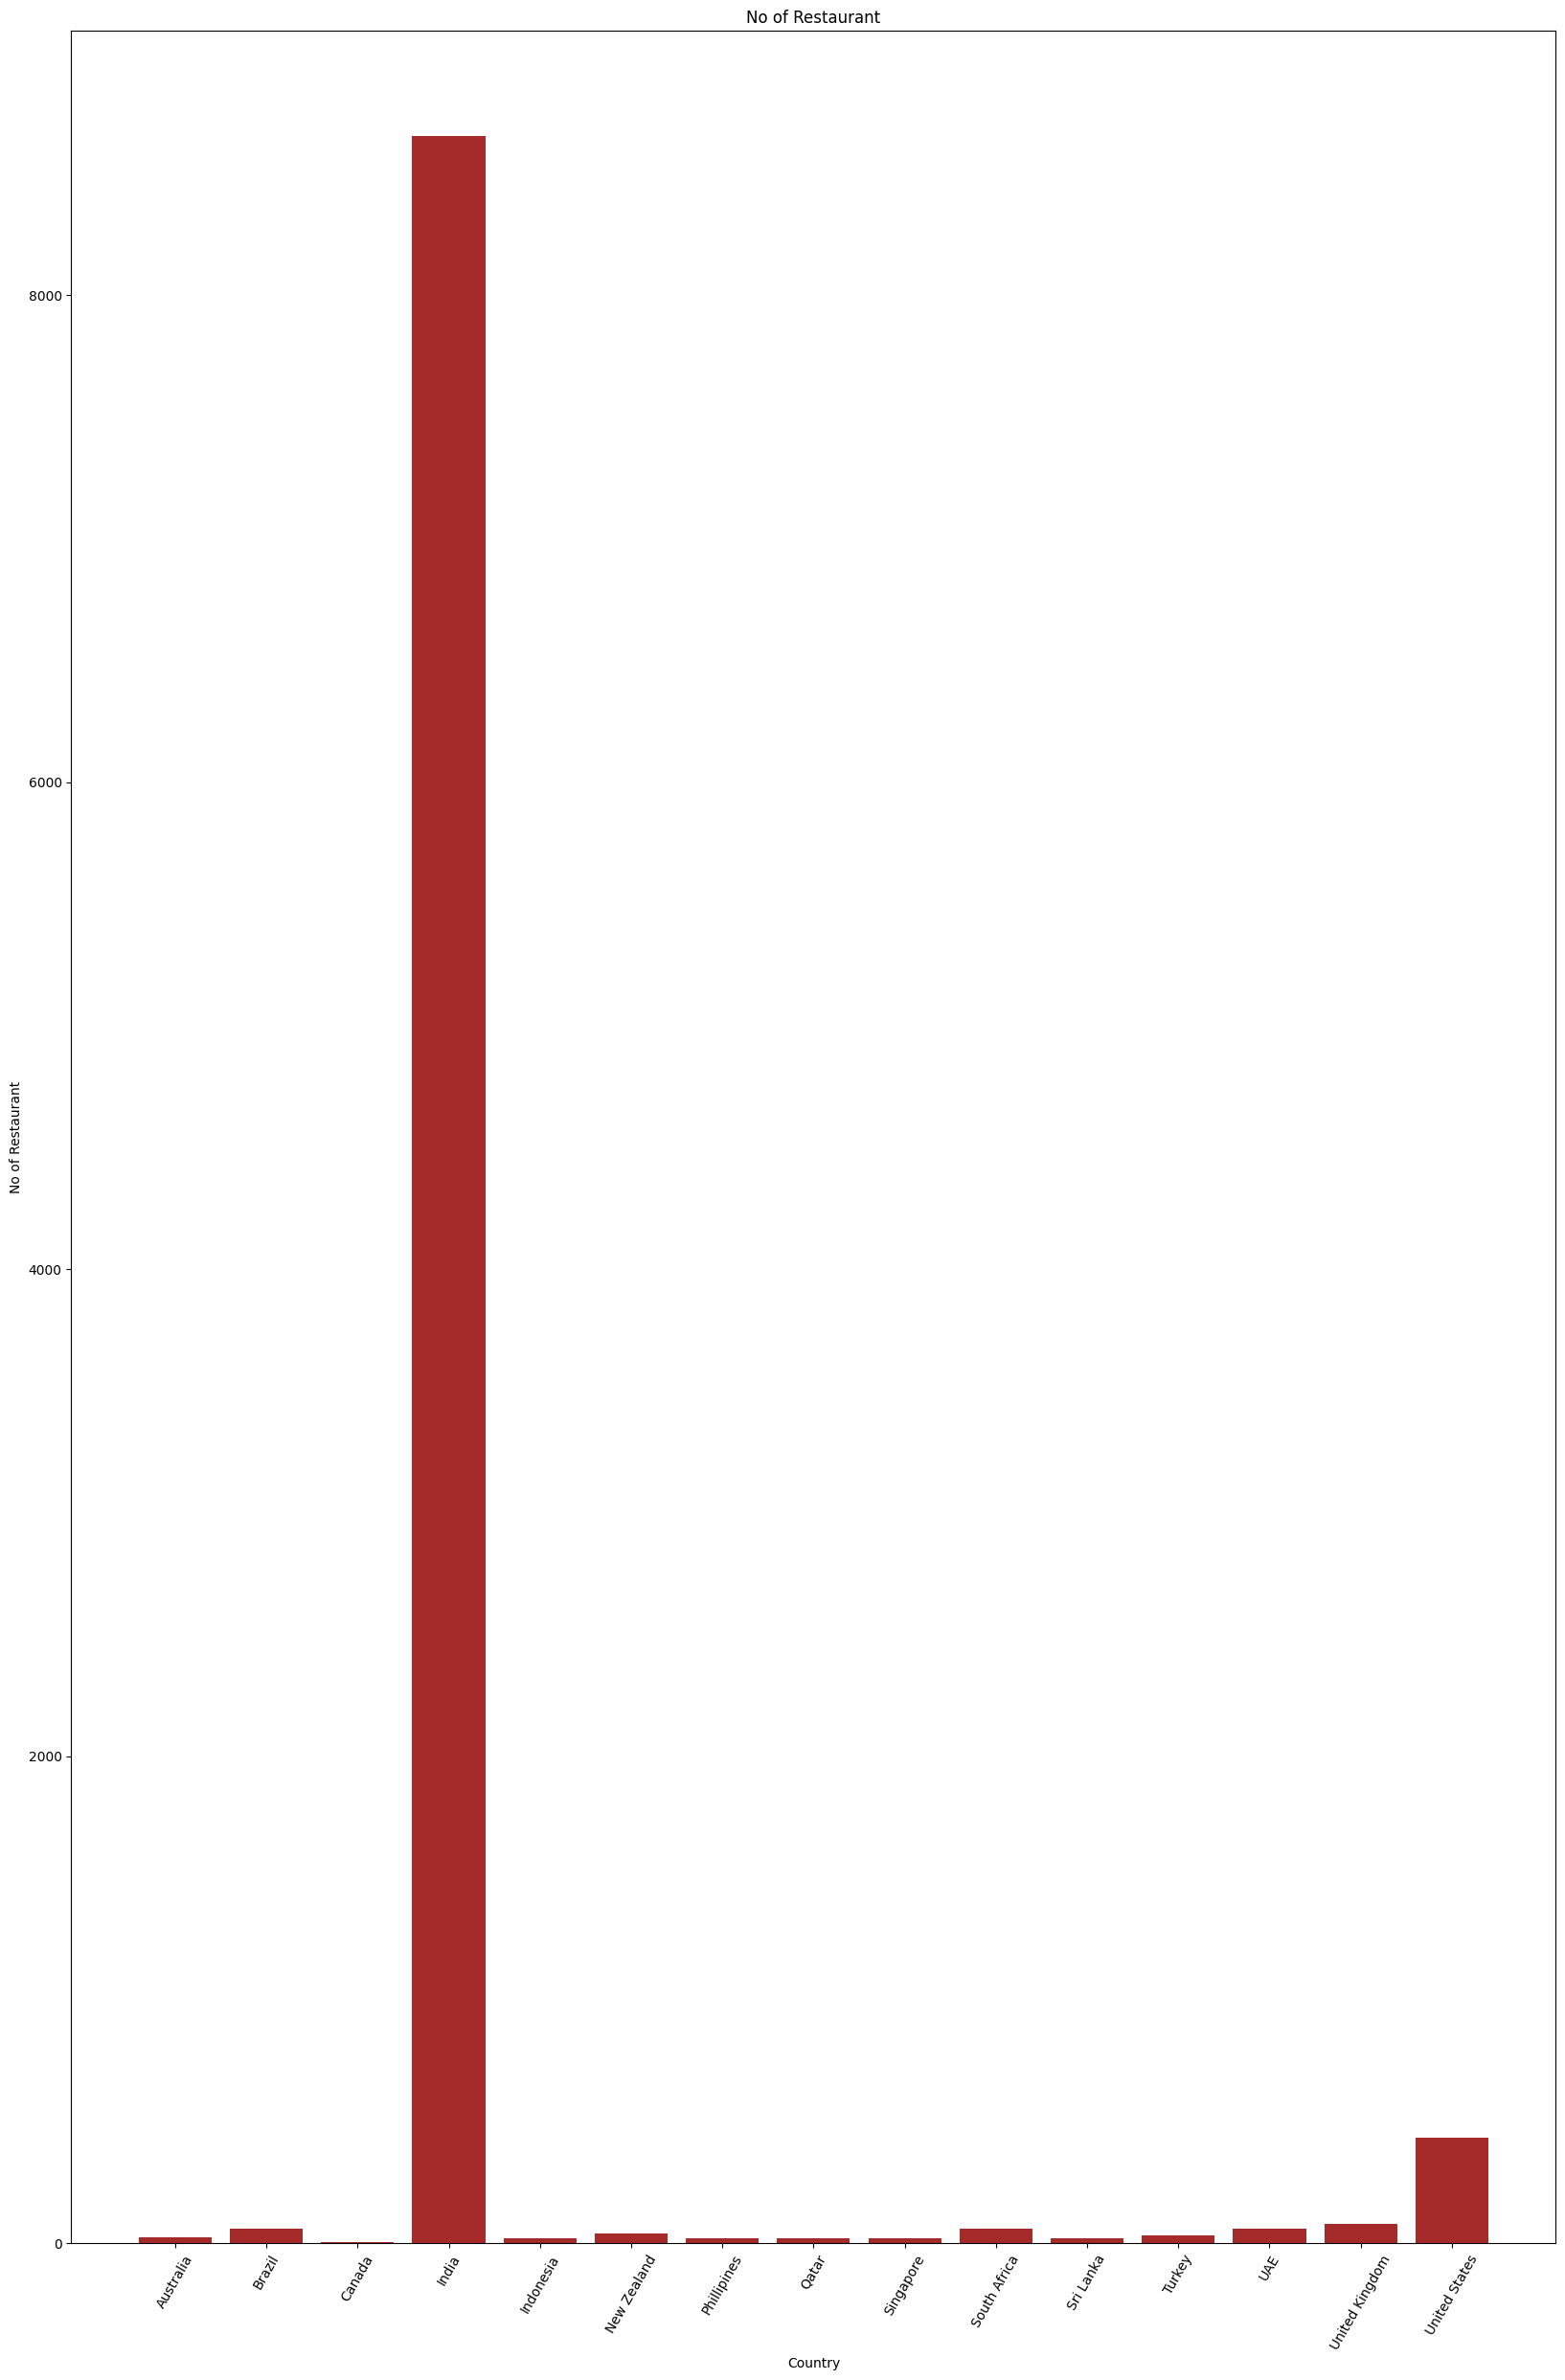

In [15]:
data_country = df.groupby(['Country'], as_index=False).count()[['Country', 'Restaurant ID']]
data_country.head()
data_country.columns = ['Country', 'No of Restaurant']
plt.figure(figsize=(20,30))
plt.bar(data_country['Country'], data_country['No of Restaurant'],color="brown")
plt.xlabel('Country')
plt.ylabel('No of Restaurant')
plt.title('No of Restaurant')
plt.xticks(rotation = 60)

2024-03-09 13:24:17,733 (font_manager.py:1411) - DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=20.0.
2024-03-09 13:24:17,734 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2024-03-09 13:24:17,735 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizFourSymReg.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-09 13:24:17,737 (font_manager.py:1423) - DEBUG: findfont: score(FontEntry(fname='e:\\College\\Graduation Project\\Python 3.11 Virtual Environment\

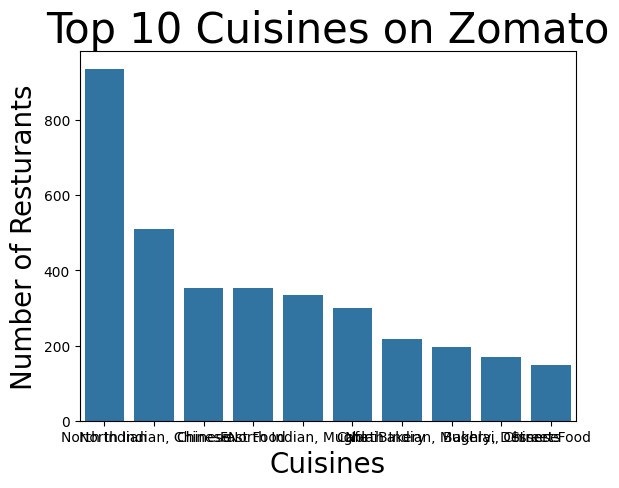

In [17]:
sns.barplot(x='Cuisines', y='Number of Resturants', data=Top10)
plt.xlabel('Cuisines', fontsize=20)
plt.ylabel('Number of Resturants', fontsize=20)
plt.title('Top 10 Cuisines on Zomato', fontsize=30)
plt.show()

Text(0, 0.5, 'Count of restaurants')

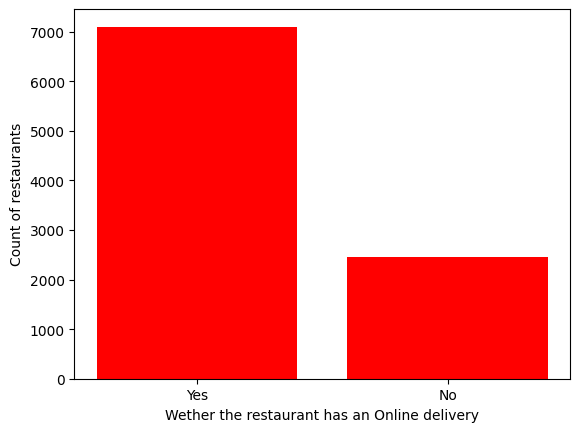

In [18]:
dummy_cuisines=pd.get_dummies(df["Has Online delivery"])
df4=dummy_cuisines.sum()
DataFrame(df4)
x=["Yes","No"]
plt.bar(x,df4,color="red")
plt.xlabel("Wether the restaurant has an Online delivery")
plt.ylabel("Count of restaurants")

In [ ]:
df.corr()
corrmat = df.corr() 
  
f,ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [26]:
from sklearn.metrics import r2_score
from predikit import Regressor
x=df[['Currency']]
y=df['Average Cost for two']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
dummies=pd.get_dummies(x_train)
dummies
dummies2=pd.get_dummies(x_test)
dummies2.head()
k=[]
accu=[]
model = Regressor(params={'n_neighbors': 5}, strategy='KNeighborsRegressor')
model.fit(dummies, y_train)  #fit the model

k=[]
accu=[]
for i in range(1,50):
    model = Regressor(params={'n_neighbors': i}, strategy='KNeighborsRegressor')
    model.fit(dummies, y_train)  #fit the model
    pred=model.predict(dummies2) #make prediction on test set
    a=dummies2.shape
    accuracy = r2_score(y_test, pred)
    print("For k=",i)
    print("Accuracy is -",accuracy*100,'%') 
    k.append(i)
    accu.append(accuracy)


For k= 1
Accuracy is - 49.04839503547018 %
For k= 2
Accuracy is - 37.80383473833421 %
For k= 3
Accuracy is - 55.07639863629639 %
For k= 4
Accuracy is - 55.84678816763151 %
For k= 5
Accuracy is - 56.24020165661716 %
For k= 6
Accuracy is - 54.176406866070614 %
For k= 7
Accuracy is - 52.88218861571596 %
For k= 8
Accuracy is - 51.99071799551827 %
For k= 9
Accuracy is - 52.319135097801464 %
For k= 10
Accuracy is - 52.031204457855736 %
For k= 11
Accuracy is - 50.93530130970058 %
For k= 12
Accuracy is - 53.11765652606184 %
For k= 13
Accuracy is - 56.44137975829011 %
For k= 14
Accuracy is - 56.13418032392501 %
For k= 15
Accuracy is - 56.425391514797106 %
For k= 16
Accuracy is - 56.159233432269254 %
For k= 17
Accuracy is - 56.074441989756664 %
For k= 18
Accuracy is - 55.06009039883683 %
For k= 19
Accuracy is - 53.9426994134081 %
For k= 20
Accuracy is - 52.77833380274144 %
For k= 21
Accuracy is - 51.57524629223816 %
For k= 22
Accuracy is - 50.368386027301405 %
For k= 23
Accuracy is - 49.18455534

Text(0, 0.5, 'R2_score')

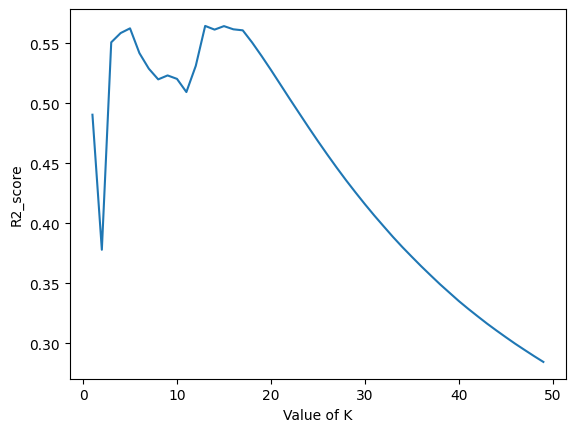

In [27]:
plt.plot(k,accu)
plt.xlabel("Value of K")
plt.ylabel("R2_score")

In [28]:
model = Regressor(params={'n_neighbors': 13}, strategy='KNeighborsRegressor')
model.fit(dummies, y_train)  #fit the model
pred=model.predict(dummies2) #make prediction on test set
a=dummies2.shape
accuracy = r2_score(y_test, pred)
for i in range(a[0]):
    print("For ",x_test.iloc[i,:])
    print("average cost for two=")
    print(pred[i])

For  Currency    Indian Rupees(Rs.)
Name: 4731, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 1468, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 9037, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 7866, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 5570, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 5613, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 7751, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 1662, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 8592, dtype: object
average cost for two=
538.4615384615385
For  Currency    Indian Rupees(Rs.)
Name: 2164, dtype: object
average cost for two

In [29]:
accuracy = r2_score(y_test, pred)
print("For K=",2)
print("Accuracy is -",accuracy*100,'%')

For K= 2
Accuracy is - 56.44137975829011 %


In [34]:
# Linear Regression
x=df[['Currency','Rating text']]
y=df['Average Cost for two']
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
dummies=pd.get_dummies(x_train)
dummies
dummies2=pd.get_dummies(x_test)
dummies2.head()
linear_model=Regressor(strategy='LinearRegression')
linear_model.fit(dummies,y_train)

LinearRegression()

In [36]:
prediction=linear_model.predict(dummies2)
r2_score(prediction,y_test)

-0.09862250214630497

In [38]:
from cmath import sqrt
from sklearn.metrics import mean_squared_error

error=sqrt(mean_squared_error(y_test,prediction))
error

(12941.284717375658+0j)